# Plots used in Report

In [1]:
from rossby_waves import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Amplitude and Dispersion

In [2]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
amp = amplitude([X, Y])

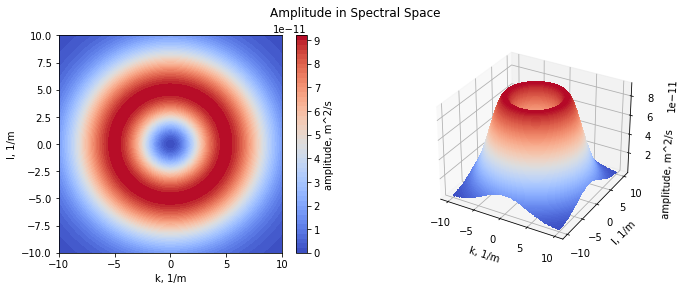

In [15]:
# amplitude in spectral space

fig = plt.figure(figsize=(11, 4))
fig.suptitle("Amplitude in Spectral Space")

ax1 = fig.add_subplot(1, 2, 1)
plot = ax1.contourf(X, Y, amp, 60, cmap="coolwarm")
ax1.set_xlabel("k, 1/m")
ax1.set_ylabel("l, 1/m")
cbar = fig.colorbar(plot, pad=0.05)
cbar.ax.set_ylabel("amplitude, m^2/s")

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.contourf3D(X, Y, amp, 120, cmap="coolwarm")
ax2.set_xlabel("k, 1/m")
ax2.set_ylabel("l, 1/m")
ax2.set_zlabel("amplitude, m^2/s                                ");

## Stream Function and Potential

In [16]:
# set up RossbyWave with wavevector (1, 3) and RossbyOcean with waves (0, 10), (10, 0), (4, 4)

ross = RossbyWave([1, 3])
waves = [RossbyWave([0, 10]), RossbyWave([10, 0]), RossbyWave(([4, 4]))]
oross = RossbyOcean(waves)

In [18]:
# set up RossbyOcean with grid of 100x100 RossbyWaves - takes ~35s

goross = RossbyOcean([ross])
goross.add_grid_waves(xlim=(-10, 10, 100), ylim=(-10, 10, 100), phase=True)
goross.remove_wave(0)

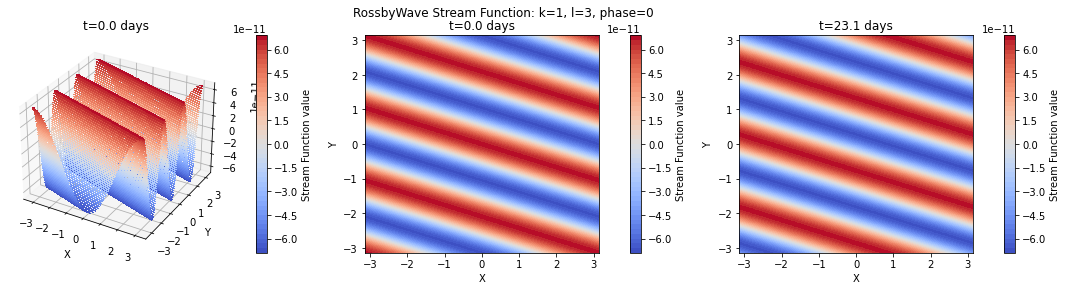

In [17]:
# plot stream function of single RossbyWave

fig = plt.figure(figsize=(19, 4))
fig.suptitle("RossbyWave Stream Function: k=1, l=3, phase=0")

ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax1 = ross.plot_streamfunction()

ax2 = fig.add_subplot(1, 3, 2)
ax2 = ross.plot_streamfunction()

ax3 = fig.add_subplot(1, 3, 3)
ax3 = ross.plot_streamfunction(t=2e13)

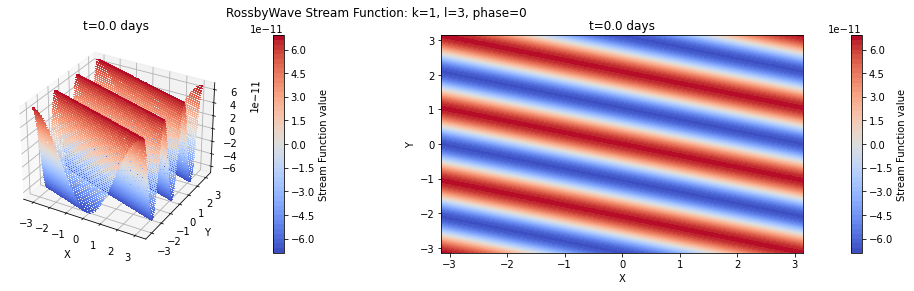

In [39]:
# plot stream function of single RossbyWave, no time change

fig = plt.figure(figsize=(19, 4))
fig.suptitle("RossbyWave Stream Function: k=1, l=3, phase=0")

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1 = ross.plot_streamfunction()

ax2 = fig.add_subplot(1, 2, 2)
ax2 = ross.plot_streamfunction()

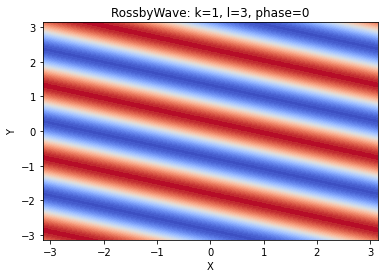

In [28]:
# animate stream function of single RossbyWave - takes ~1m10s

ross.animate_streamfunction(tlim=(0, 9e12, 500), filename="wave_streamfunction")

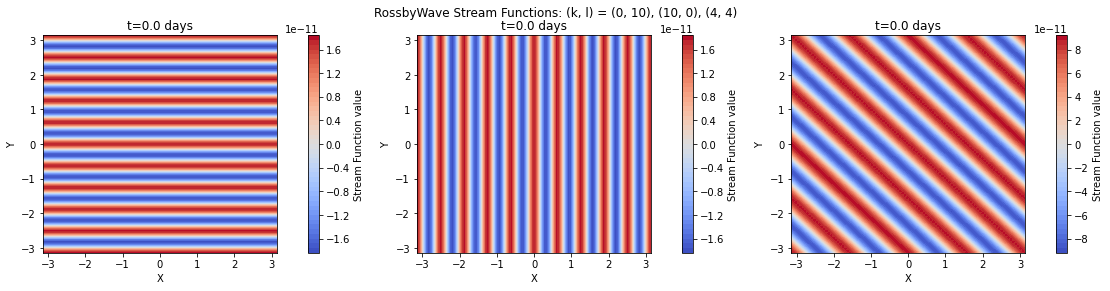

In [40]:
# plot stream function of 3 individual RossbyWaves making up RossbyOcean

fig = plt.figure(figsize=(19, 4))
fig.suptitle("RossbyWave Stream Functions: (k, l) = (0, 10), (10, 0), (4, 4)")

ax1 = fig.add_subplot(1, 3, 1)
ax1 = RossbyWave((0, 10)).plot_streamfunction()

ax2 = fig.add_subplot(1, 3, 2)
ax2 = RossbyWave((10, 0)).plot_streamfunction()

ax3 = fig.add_subplot(1, 3, 3)
ax3 = RossbyWave((4, 4)).plot_streamfunction()

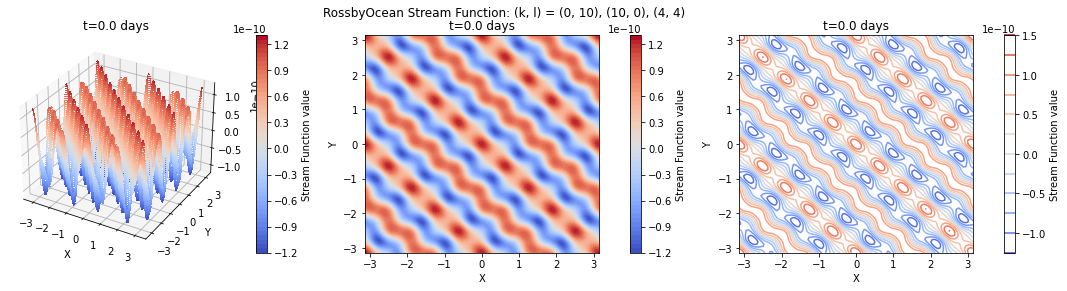

In [32]:
# plot stream function of RossbyOcean

fig = plt.figure(figsize=(19, 4))
fig.suptitle("RossbyOcean Stream Function: (k, l) = (0, 10), (10, 0), (4, 4)")

ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax1 = oross.plot_streamfunction()

ax2 = fig.add_subplot(1, 3, 2)
ax2 = oross.plot_streamfunction()

ax3 = fig.add_subplot(1, 3, 3)
ax3 = oross.plot_streamfunction(filled=False, lines=10)

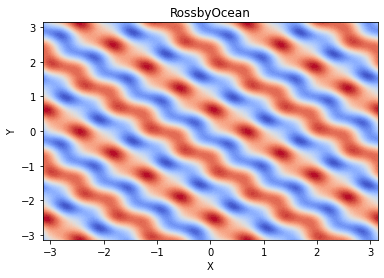

In [30]:
# animate stream function of RossbyOcean, takes 1m20s

oross.animate_streamfunction(tlim=(0, 9e12, 500), filename="filled_ocean_streamfunction")

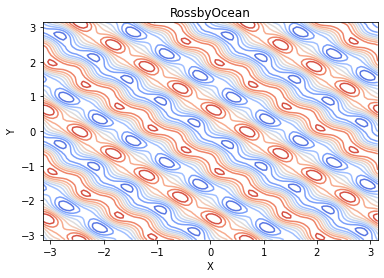

In [33]:
# animate stream function of RossbyOcean, clear contour lines - takes ~45s

oross.animate_streamfunction(tlim=(0, 9e12, 500), filled=False, lines=10, filename="unfilled_ocean_streamfunction")

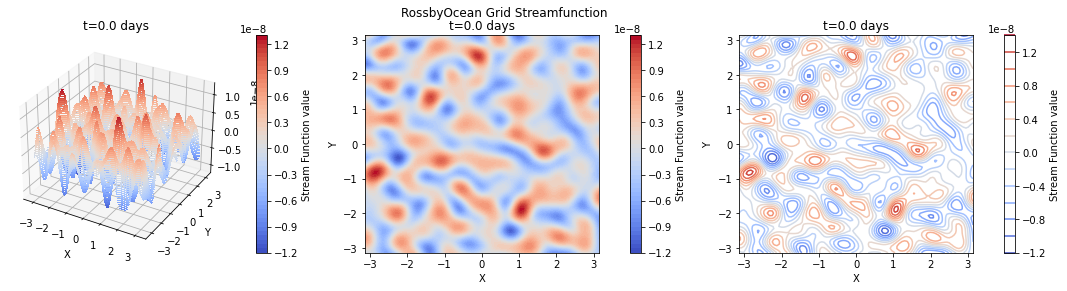

In [20]:
# plot stream function of RossbyOcean grid

fig = plt.figure(figsize=(19, 4))
fig.suptitle("RossbyOcean Grid Streamfunction")

ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax1 = goross.plot_streamfunction()

ax2 = fig.add_subplot(1, 3, 2)
ax2 = goross.plot_streamfunction()

ax3 = fig.add_subplot(1, 3, 3)
ax3 = goross.plot_streamfunction(filled=False, lines=15)

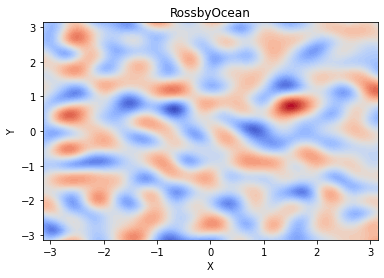

In [38]:
# animate stream function of RossbyOcean grid - takes 11m5s

goross.animate_streamfunction(tlim=(0, 4e12, 200), filename="filled_ocean_grid_streamfunction")

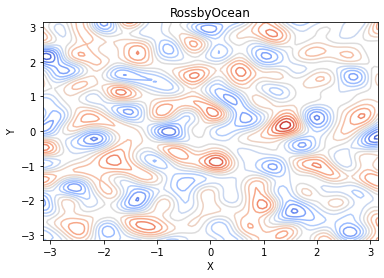

In [42]:
# animate stream function of RossbyOcean grid, clear contour lines - takes 15m30s

goross.animate_streamfunction(tlim=(0, 6e12, 300), filled=False, lines=15, filename="unfilled_ocean_grid_streamfunction")

## Velocity Field

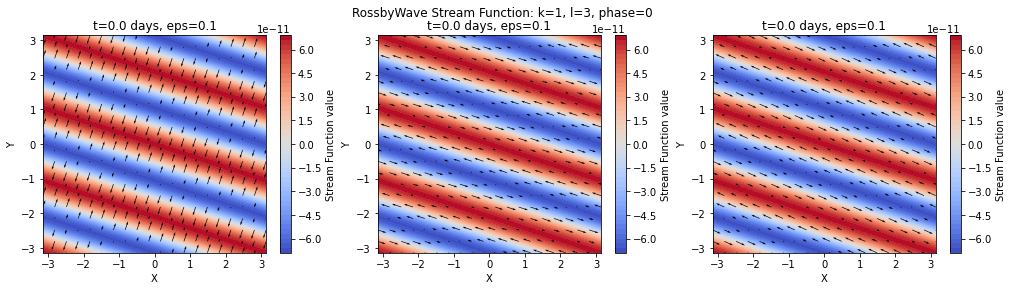

In [21]:
fig = plt.figure(figsize=(17, 4))
fig.suptitle("RossbyWave Stream Function: k=1, l=3, phase=0")

ax1 = fig.add_subplot(1, 3, 1)
ax1 = ross.plot_stream_velocity(irrotational=True)

ax2 = fig.add_subplot(1, 3, 2)
ax2 = ross.plot_stream_velocity(solenoidal=True)

ax3 = fig.add_subplot(1, 3, 3)
ax3 = ross.plot_stream_velocity()

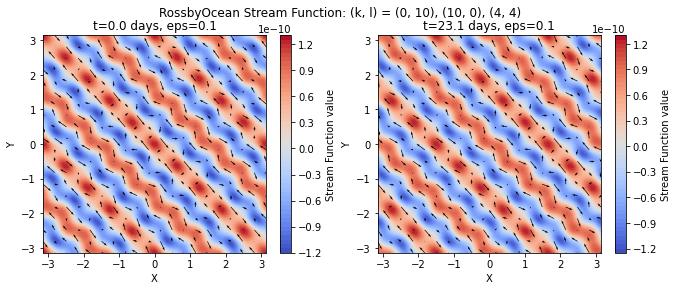

In [22]:
fig = plt.figure(figsize=(11, 4))
fig.suptitle("RossbyOcean Stream Function: (k, l) = (0, 10), (10, 0), (4, 4)")

ax1 = fig.add_subplot(1, 2, 1)
ax1 = oross.plot_stream_velocity()

ax2 = fig.add_subplot(1, 2, 2)
ax2 = oross.plot_stream_velocity(t=2e13)

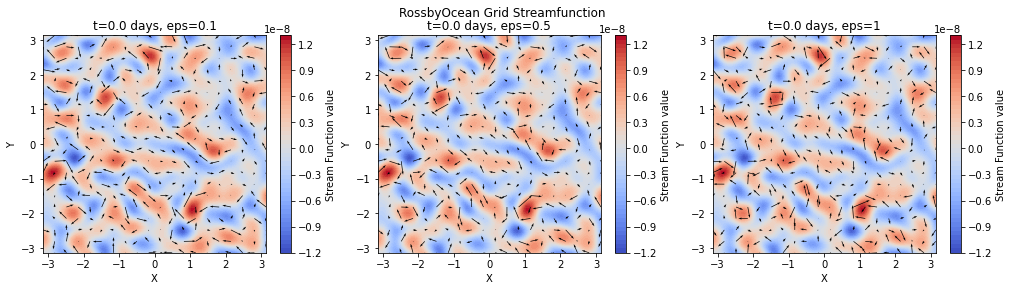

In [23]:
fig = plt.figure(figsize=(17, 4))
fig.suptitle("RossbyOcean Grid Streamfunction")

ax1 = fig.add_subplot(1, 3, 1)
ax1 = goross.plot_stream_velocity()

ax2 = fig.add_subplot(1, 3, 2)
ax2 = goross.plot_stream_velocity(eps=0.5)

ax3 = fig.add_subplot(1, 3, 3)
ax3 = goross.plot_stream_velocity(eps=1)

## Velocity Divergence

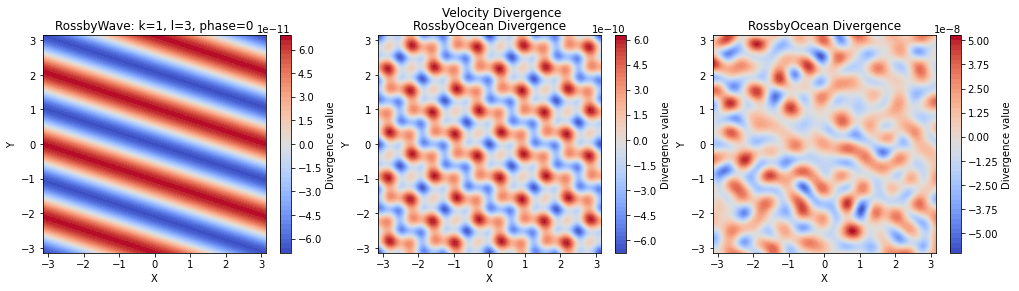

In [24]:
fig = plt.figure(figsize=(17, 4))
fig.suptitle("Velocity Divergence")

ax1 = fig.add_subplot(1, 3, 1)
ax1 = ross.plot_velocity_divergence()

ax2 = fig.add_subplot(1, 3, 2)
ax2 = oross.plot_velocity_divergence()

ax3 = fig.add_subplot(1, 3, 3)
ax3 = goross.plot_velocity_divergence()